In [178]:
import numpy as np
import matplotlib.pyplot as plt
from wave_spectra import JONSWAP

plt.rcParams.update({
    'figure.figsize': (16, 6),
    'font.size': 15,
    'lines.linewidth': 1.5,
    'axes.grid': True
})

In [214]:
N = 75      # Number of frequencies
hs = 0.06
tp = 1.15
wp = 2*np.pi/tp

wmin = wp/2
wmax = 3*wp

dw = (wmax - wmin)/N

w = np.linspace(wmin, wmax, N)

std = (dw/2)/2

spectrum = JONSWAP(w)
spectrum2 = JONSWAP(w + np.random.normal(0.0, std, size=len(w)))   # Random selection of frequencies. std selected to ensure w_j 95% probable in dw area.
freqs, spec = spectrum(hs, tp, gamma=3.3)
freq2, spec2 = spectrum2(hs, tp, gamma=3.3)

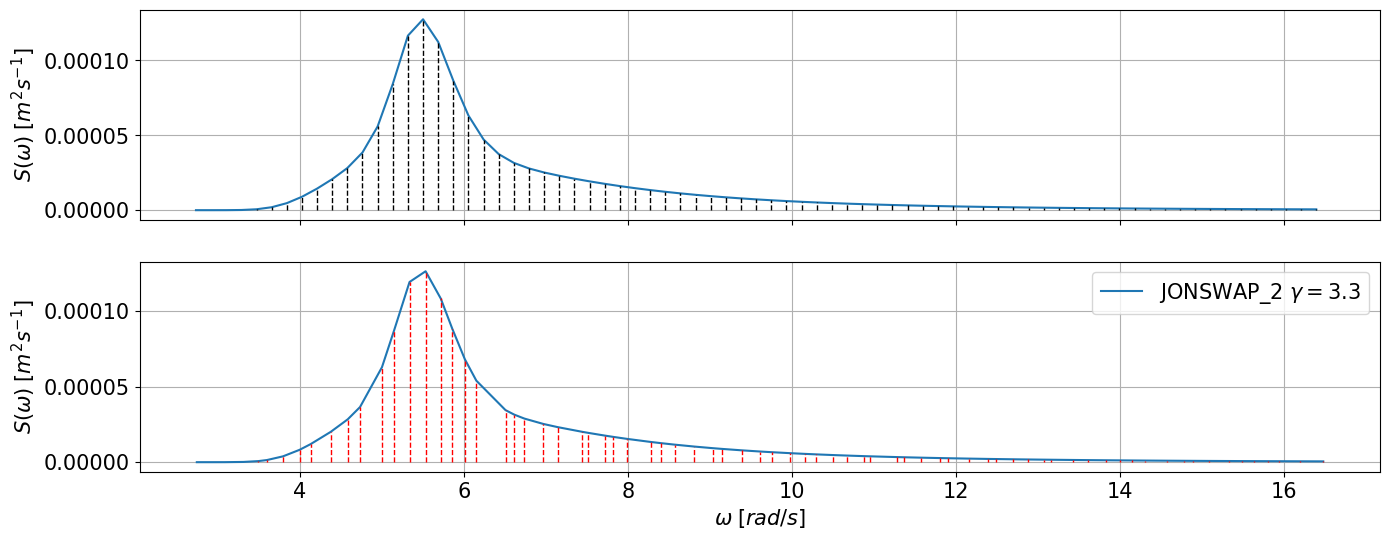

In [215]:
fig, ax = plt.subplots(2,1, sharex=True)
plt.sca(ax[0])

plt.plot(freqs, spec, label="JONSWAP $\gamma = 3.3$")
plt.vlines(x=freqs, ymin=np.zeros_like(spec), ymax=spec, linestyles='--', color='black', linewidth=1.0)
plt.ylabel("$S(\omega) \; [m^2s^{-1}]$")

plt.sca(ax[1])
plt.plot(freq2, spec2, label="JONSWAP_2 $\gamma = 3.3$")
plt.vlines(x=freq2, ymin=np.zeros_like(spec2), ymax=spec2, linestyles="--", color="red", linewidth=1.0)
plt.xlabel("$\omega \; [rad/s]$")
plt.ylabel("$S(\omega) \; [m^2s^{-1}]$")
# plt.vlines(x=freqs+np.random.normal(loc=.0, scale=dw/2, size=len(freqs)), ymin=np.zeros_like(spec), ymax=spec, color="red")
plt.legend()
plt.show()

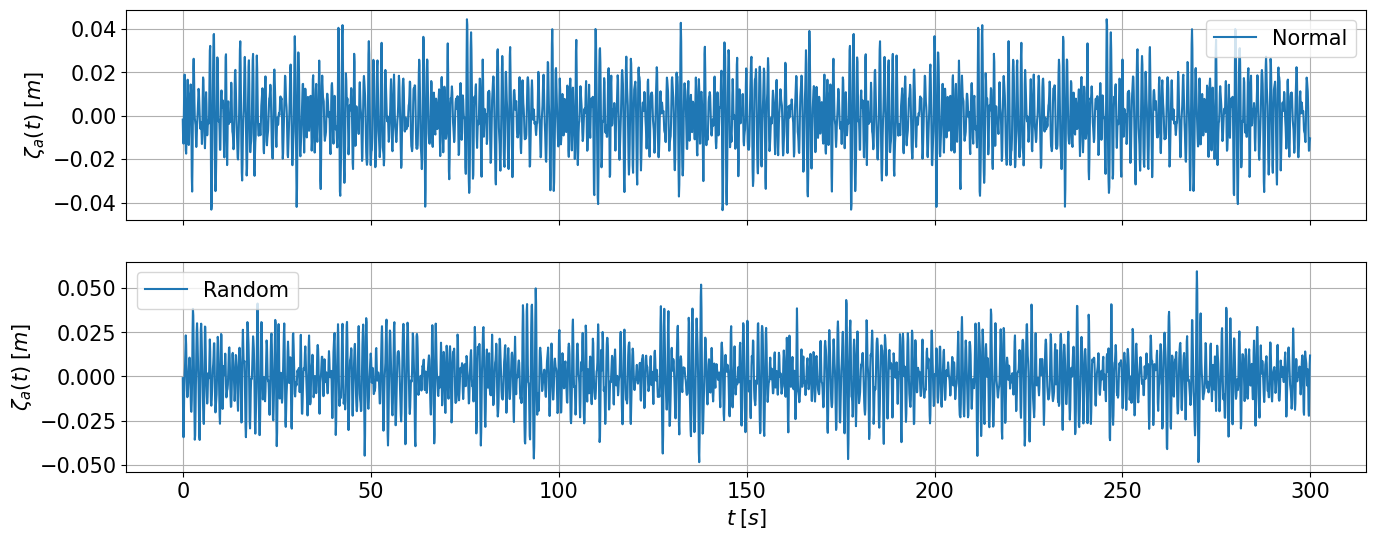

In [216]:
t = np.arange(0, 5*60, 0.1)

realization1 = spectrum.realization(t, hs=hs, tp=tp, gamma=3.3)
realization2 = spectrum2.realization(t, hs=hs, tp=tp, gamma=3.3)

fig, ax = plt.subplots(2, 1, sharex=True)

plt.sca(ax[0])
plt.plot(t, realization1, label="Normal")
plt.ylabel("$\zeta_a(t)\;[m]$")
plt.legend()

plt.sca(ax[1])
plt.plot(t, realization2, label="Random")
plt.xlabel("$t \; [s]$")
plt.ylabel("$\zeta_a(t) \; [m]$")
plt.legend()
plt.show()


In [217]:
hs_est_1 = 4*np.sqrt(np.average(realization1**2))
hs_est_2 = 4*np.sqrt(np.average(realization2**2))
print(f"Hs estimate (timeseries 1): {hs_est_1:.2f} [m] -> Close to true value: {np.isclose(hs_est_1, hs, rtol=1e-1)}")
print(f"Hs estimate (timeseries 2): {hs_est_2:.2f} [m] -> Close to true value: {np.isclose(hs_est_2, hs, rtol=1e-1)}")

Hs estimate (timeseries 1): 0.06 [m] -> Close to true value: True
Hs estimate (timeseries 2): 0.06 [m] -> Close to true value: True


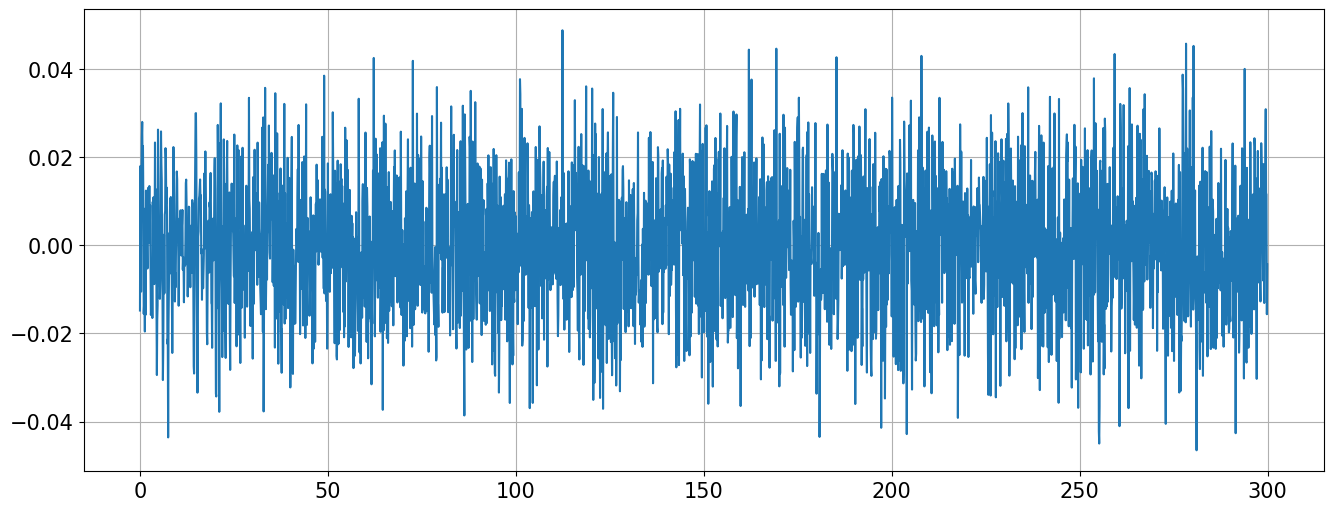

In [218]:
# Reproduction of Brørby kode - this is the way he has implemented the random phase.

wave_amp = np.sqrt(2*spec*dw)
eps = np.random.uniform(0, 2*np.pi, size=len(freq2))
wave_elev = np.zeros_like(t)

x = 10  # x position at 10 meters

for i in range(len(t)):

    freq3 = freq2.copy() + np.random.normal(0, dw/2, size=len(freq2))
    k = freq3**2/9.81
    wave_elev[i] = np.sum(wave_amp * np.cos(freq3*t[i] - k*x + eps))


plt.plot(t, wave_elev)
plt.show()

In [219]:
print(4*np.sqrt(np.average(wave_elev**2)))

0.05989368032948685
